In [30]:
import numpy as np
import pandas as pd

In [31]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [32]:
df.shape

(500, 9)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [34]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
# dropping of the unnecessary column
df.drop(['Serial No.'], inplace=True, axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [37]:
# defining the independent and dependent variables
X = df.iloc[:, 0:-1]  # independent variables
y = df.iloc[:, -1]  # dependent variable

In [38]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [39]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [40]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [41]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [42]:
from sklearn.preprocessing import MinMaxScaler # Normalization
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train) # fit and transform the training data
X_test_scaled = scaler.transform(X_test) # transform the testing data

X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [43]:
# building up the neural network
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [44]:
# defining the model
model = Sequential()

# adding the input layer
model.add(Dense(7, activation='relu', input_dim=7)) # 7 neurons in the input layer

# adding the hidden layers
model.add(Dense(7, activation='relu')) # 7 neurons in the first hidden layer

# adding the output layer
model.add(Dense(1, activation='linear')) # 1 neuron in the output layer

c:\Users\DC\miniconda3\envs\TF_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
# compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
# training the model
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2) # 20% of the training data will be used for validation

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5953 - val_loss: 0.5626
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4922 - val_loss: 0.4747
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4052 - val_loss: 0.4055
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3519 - val_loss: 0.3268
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2808 - val_loss: 0.2294
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1896 - val_loss: 0.1240
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0938 - val_loss: 0.0589
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0444 - val_loss: 0.0351
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0308 - val_loss: 0.0304
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0271 - val_loss: 0.0272
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0217 - val_loss: 0.0229
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

In [48]:
# predicting the test data
y_pred = model.predict(X_test_scaled)
y_pred

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001DB95109E40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[0.64283544],
       [0.7157303 ],
       [0.8861298 ],
       [0.7218029 ],
       [0.81810015],
       [0.6609894 ],
       [0.7404403 ],
       [0.6922397 ],
       [0.7867784 ],
       [0.60601103],
       [0.67775273],
       [0.4943835 ],
       [0.78854   ],
       [0.77404547],
       [0.769254  ],
       [0.8715715 ],
       [0.6193784 ],
       [0.75153726],
       [0.9091788 ],
       [0.6247327 ],
       [0.60468626],
       [0.7600144 ],
       [0.8345026 ],
       [0.521046  ],
       [0.7506131 ],
       [0.57949454],
       [0.9530769 ],
       [0.6323839 ],
       [0.86668885],
       [0.70900834],
       [0.6105847 ],
       [0.80784756],
       [0.6117881 ],
       [0.9043615 ],
       [0.5022487 ],
       [0.81118125],
       [0.6776737 ],
       [0.634557  ],
       [0.6632189 ],
       [0.90484554],
       [0.51078737],
       [0.62699765],
       [0.7842441 ],
       [0.9764122 ],
       [0.76595265],
       [0.50641817],
       [0.6701504 ],
       [0.641

In [49]:
# evaluating the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8253364073538794

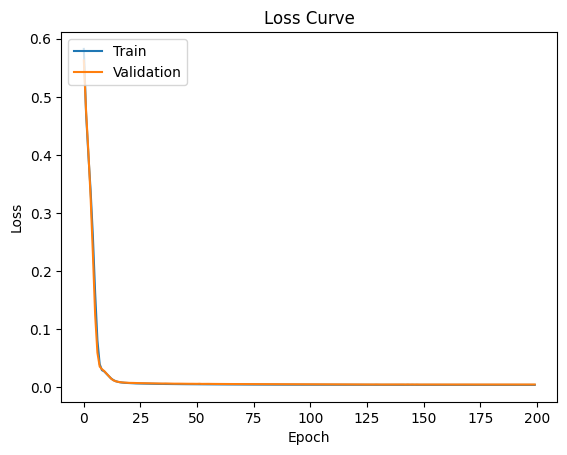

In [50]:
# plotting the loss curve
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()